In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
df['TypeofContact'].value_counts(),df['Occupation'].value_counts(),df['Gender'].value_counts(),df['ProductPitched'].value_counts(),df['MaritalStatus'].value_counts(),df['Designation'].value_counts()

(TypeofContact
 Self Enquiry       3444
 Company Invited    1419
 Name: count, dtype: int64,
 Occupation
 Salaried          2368
 Small Business    2084
 Large Business     434
 Free Lancer          2
 Name: count, dtype: int64,
 Gender
 Male       2916
 Female     1817
 Fe Male     155
 Name: count, dtype: int64,
 ProductPitched
 Basic           1842
 Deluxe          1732
 Standard         742
 Super Deluxe     342
 King             230
 Name: count, dtype: int64,
 MaritalStatus
 Married      2340
 Divorced      950
 Single        916
 Unmarried     682
 Name: count, dtype: int64,
 Designation
 Executive         1842
 Manager           1732
 Senior Manager     742
 AVP                342
 VP                 230
 Name: count, dtype: int64)

In [6]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df.Gender.value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [7]:
df.MaritalStatus = df.MaritalStatus.replace('Single','Unmarried')
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [8]:
# check column with missing

feature_with_na = [feature for feature in df.columns if df[feature].isnull().sum() >= 1]
for i in feature_with_na:
    print(i,np.round(df[i].isnull().mean()*100,5),"% value are missing")

Age 4.62357 % value are missing
TypeofContact 0.51146 % value are missing
DurationOfPitch 5.13502 % value are missing
NumberOfFollowups 0.92062 % value are missing
PreferredPropertyStar 0.53191 % value are missing
NumberOfTrips 2.86416 % value are missing
NumberOfChildrenVisiting 1.35025 % value are missing
MonthlyIncome 4.76678 % value are missing


In [9]:
# satistics of numerical null columns

df[feature_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null values
1. Impute Median value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome



In [10]:
# Age
df.Age.fillna(df.Age.median(),inplace = True)


# Type of Contract
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)


# DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

# NumberofFollowup
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace = True)

#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

# NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

# MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)


In [11]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [12]:
df.drop('CustomerID',axis=1, inplace = True)

## Feature Engineering

### Feature Extraction

In [13]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [14]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'], inplace= True, axis=1)

In [15]:
df.shape

(4888, 18)

In [16]:
# _feature

num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
descrete_feature = [feature for feature in num_feature if len(df[feature].unique())<=25]
continuous_feature = [feature for feature in num_feature if feature not in descrete_feature]

print('number of nomerical Feature: ',len(num_feature))
print('number of categorical Feature: ',len(cat_feature))
print('number of descrete Feature: ',len(descrete_feature))
print('number of continuous Feature: ',len(continuous_feature))


number of nomerical Feature:  12
number of categorical Feature:  6
number of descrete Feature:  9
number of continuous Feature:  3


In [17]:
x = df.drop('ProdTaken',axis = 1)
y = df['ProdTaken']

In [18]:
x.shape,y.shape

((4888, 17), (4888,))

In [19]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3910, 17), (978, 17), (3910,), (978,))

In [21]:
cat_feature = x.select_dtypes(include='object').columns
num_feature = x.select_dtypes(exclude='object').columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer



scaler = StandardScaler()
Oh_transformer = OneHotEncoder(drop='first')


preprocessor = ColumnTransformer([
    ('OneHotEncoder',Oh_transformer,cat_feature),
    ('StandardScaler',scaler,num_feature)
])

x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [22]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


## GradientBoost Classifier Training
#### We can also combine multiple algorithms


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve



In [24]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
     "Gredient Boost" : GradientBoostingClassifier(),
     "AdaBoostClassifier" : AdaBoostClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)


    # Make Prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)



    # Train set performence 
    model_train_accuracy = accuracy_score(y_train,y_train_pred)# calculate accuracy
    model_train_f1 = f1_score(y_train,y_train_pred)  # calculate f1_score
    model_train_precision_score = precision_score(y_train,y_train_pred)# calculate precision
    model_train_recall_score = recall_score(y_train,y_train_pred)# Calculate Recall
    model_train_roc_auc_score = roc_auc_score(y_train,y_train_pred)# Calculate Roc



    # Test set performence 
    model_test_accuracy = accuracy_score(y_test,y_test_pred)# calculate accuracy
    model_test_f1 = f1_score(y_test,y_test_pred)  # calculate f1_score
    model_test_precision_score = precision_score(y_test,y_test_pred)# calculate precision
    model_test_recall_score = recall_score(y_test,y_test_pred)# Calculate Recall
    model_test_roc_auc_score = roc_auc_score(y_test,y_test_pred)# Calculate Roc
    


    print(list(models.keys())[i])

    print("Model Performance For Training Dataset")
    print('-accuracy: {:.4f}'.format(model_train_accuracy))
    print('-f1_score: {:.4f}'.format(model_train_f1))
    print('-Precision_Score: {:.4f}'.format(model_train_precision_score))
    print('-recall_score: {:.4f}'.format(model_train_recall_score))
    print('-roc_auc_score: {:.4f}'.format(model_train_roc_auc_score))

    print('----------------------------------') 
    
    print("Model Performance For Test Dataset")
    print('-accuracy: {:.4f}'.format(model_test_accuracy))
    print('-f1_score: {:.4f}'.format(model_test_f1))
    print('-Precision_Score: {:.4f}'.format(model_test_precision_score))
    print('-recall_score: {:.4f}'.format(model_test_recall_score))
    print('-roc_auc_score: {:.4f}'.format(model_test_roc_auc_score))


    print("="*35)
    print("\n")


Logistic Regression
Model Performance For Training Dataset
-accuracy: 0.8460
-f1_score: 0.4234
-Precision_Score: 0.7016
-recall_score: 0.3032
-roc_auc_score: 0.6368
----------------------------------
Model Performance For Test Dataset
-accuracy: 0.8364
-f1_score: 0.4118
-Precision_Score: 0.6914
-recall_score: 0.2932
-roc_auc_score: 0.6307


Decision Tree
Model Performance For Training Dataset
-accuracy: 1.0000
-f1_score: 1.0000
-Precision_Score: 1.0000
-recall_score: 1.0000
-roc_auc_score: 1.0000
----------------------------------
Model Performance For Test Dataset
-accuracy: 0.9202
-f1_score: 0.7937
-Precision_Score: 0.8021
-recall_score: 0.7853
-roc_auc_score: 0.8692


Random Forest
Model Performance For Training Dataset
-accuracy: 1.0000
-f1_score: 1.0000
-Precision_Score: 1.0000
-recall_score: 1.0000
-roc_auc_score: 1.0000
----------------------------------
Model Performance For Test Dataset
-accuracy: 0.9264
-f1_score: 0.7750
-Precision_Score: 0.9612
-recall_score: 0.6492
-roc_auc

In [30]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}



Gredient_Boost ={
    "n_estimators":[50,60,70,80,90,100],
    'learning_rate':[0.1,0.01],
    'criterion':['friedman_mse', 'squared_error'],
    'loss':['log_loss','exponential'],
    'min_samples_split' : [2,8,15,20],
    'max_depth': [5,8,15, None, 10]
}





# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
                    ("GradientBosstingclassifier", GradientBoostingClassifier(),Gredient_Boost )
]








from sklearn.model_selection import RandomizedSearchCV


model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
---------------- Best Params for GradientBosstingclassifier -------------------
{'n_estimators': 90, 'min_samples_split': 15, 'max_depth': 15, 'loss': 'exponential', 'learning_rate': 0.1, 'criterion': 'squared_error'}


In [31]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=500,min_samples_split=2,
                                          max_features=8,max_depth=None),
    "Gredient Boost" : GradientBoostingClassifier(n_estimators= 90, min_samples_split= 15, max_depth= 15, loss= 'exponential', learning_rate= 0.1, criterion= 'squared_error')
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9335
- F1 score: 0.9291
- Precision: 0.9632
- Recall: 0.6859
- Roc Auc Score: 0.8398


Gredient Boost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9560
- F1 score: 0.9545
- Precision: 0.9625
- Recall: 0.8063
- Roc Auc Score: 0.8993




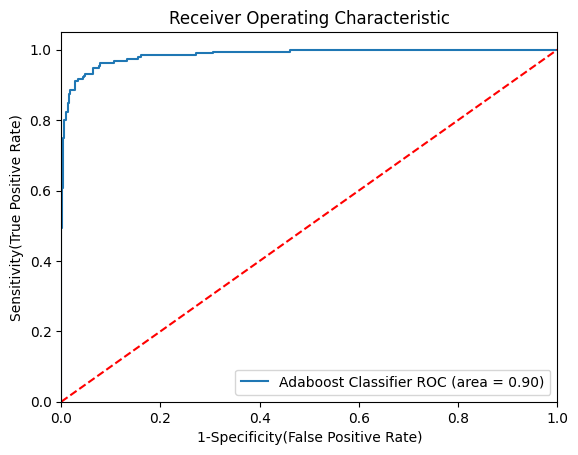

In [33]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Adaboost Classifier',
    "model" : GradientBoostingClassifier(n_estimators= 90, min_samples_split= 15, max_depth= 15, loss= 'exponential', learning_rate= 0.1, criterion= 'squared_error'),
    'auc': 0.8993
},
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(x_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()  